## Milestone 3 - Independent Project

### Kumaran Singaram

### Abstract

This data set is on telco customer churn. Using this data set, I can predict customer churn using their historical behavior and demographic data, which can help the company build dedicated customer retention programs. Each row in the data set represents an individual customer (as indicated by their customer ID). Each column represents customer attributes, which can be used for analysis and prediction.

Features:

- customerID: ID of the customer
- gender: gender of the customer
- Senior Citizen: binary variable indicating whether the customer classifies as a senior citizen (> 60) or not
- Partner: binary variable indicating whether the customer has a partner
- Dependents: binary variable indicating whether the customer has dependents
- tenure: number of months customer has stayed with the company
- Phone Service: binary variable indicating whether customer has phone service
- Multiple Lines: does the customer have multiple lines
- Internet Service: customer's internet provider
- Online Security: does the customer have online security
- Online Backup: does the customer have online backup
- Device Protection: does the customer have device protection
- Tech Support: does the customer use tech support
- StreamingTV: does the customer have TV streaming
- Streaming Movies: does the customer have movie streaming
- Contract: contract term of the customer
- Paperless Billing: whether the customer has paperless billing
- Payment Method: customer's payment method
- Monthly Charges: the amount charged to the customer monthly
- Total Charges: the total amount charged to the customer
- Churn: whether the customer churned or not in the last month

To explore this dataset, we will use a variety of EDA techniques to summarize and slice the data in ways that we can better understand the relationships between the independent variables and churn. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read in data
telco = pd.read_csv('data/telco_churn.csv')

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cleaning Data

The data set is relatively clean, but there are a few things to fix. We will drop unneccesary columns and and impute data where needed.

In [4]:
#drop ID column

telco = telco.drop(['customerID'], axis = 1)

In [5]:
#clean data

telco['TotalCharges'] = telco['TotalCharges'].replace(to_replace = ' ', value = np.nan, regex = True)
telco['TotalCharges'] = telco['TotalCharges'].astype('float')

In [6]:
#impute missing data with mean

def fill_mean(x):
    x = pd.to_numeric(x, errors = 'coerce')
    dropped_na = x[~np.isnan(x)]
    mean = np.mean(dropped_na)
    x[np.isnan(x)] = mean
    return x

telco['TotalCharges'] = fill_mean(telco['TotalCharges'])
    
telco.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#change data types

telco[telco.select_dtypes('object').columns] = telco.select_dtypes('object').astype('category')
telco['SeniorCitizen'] = telco['SeniorCitizen'].astype('category')

### EDA

In [8]:
#create crosstab tables to visualize churn by category

purple = sns.light_palette("purple", as_cmap=True)
pd.crosstab(index = telco['PaymentMethod'], 
            columns = telco['Churn'], normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [9]:
#create crosstab tables to visualize churn with counts

purple = sns.light_palette("purple", as_cmap=True)
pd.crosstab(index = telco['PaymentMethod'], 
            columns = telco['Churn']).style.background_gradient(cmap=purple)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [10]:
purple = sns.light_palette("purple", as_cmap=True)
pd.crosstab(index = telco['PaperlessBilling'], columns = telco['Churn'], 
           normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


Customers who paid via Electronic check seem to have a significantly higher likelihood to churn. This is the case for customers who went with paperless billing as well. The theory here could be that those that are more tech inclined (prefer no direct mail) are maybe more likely to shop around for different deals. As for electronic check, we are dealing with a fairly high sample size so it is probably significant, but it's difficult to come up with a theory that makes sense.

In [11]:
purple = sns.light_palette("red", as_cmap=True)
pd.crosstab(index = telco['Dependents'], columns = telco['Churn'], 
            normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


In [12]:
purple = sns.light_palette("red", as_cmap=True)
pd.crosstab(index = telco['Partner'], columns = telco['Churn'], 
            normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


It looks like both Partner and Dependents will be important features in the model. Customers with dependents seem especially likely to be retained, which makes sense intuitively.

In [13]:
purple = sns.light_palette("blue", as_cmap=True)
pd.crosstab(index = telco['Contract'], columns = telco['Churn'], 
            normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [14]:
purple = sns.light_palette("purple", as_cmap=True)
pd.crosstab(index = telco['InternetService'], columns = telco['Churn'], 
            normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


Contract is likely to be a major driver of the model. The data confirms this with 43% of month to month customers churning. This is about 25x higher than customers with two year contracts.

As for internet service, we see some surprising results. Those without internet service churned were less likely to churn by a lot. This may indicate that customers with internet service were disappointed with the service or were able to get better deals from another player.

In [15]:
purple = sns.light_palette("purple", as_cmap=True)
pd.crosstab(index = telco['PhoneService'], columns = telco['Churn'], 
            normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


In [16]:
purple = sns.light_palette("purple", as_cmap=True)
pd.crosstab(index = telco['MultipleLines'], columns = telco['Churn'], 
            normalize = 'index').style.background_gradient(cmap=purple)

Churn,No,Yes
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099


Neither of these variables look to be significant. 

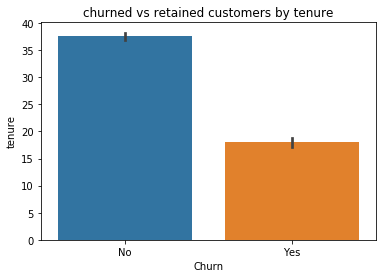

In [17]:
ax = sns.barplot(x = 'Churn', y = 'tenure', data = telco)
ax.set_title('churned vs retained customers by tenure');

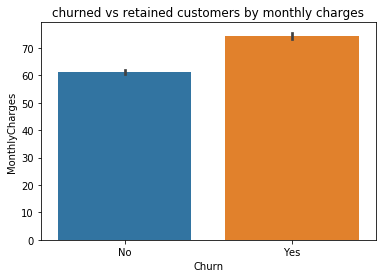

In [18]:
ax = sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = telco)
ax.set_title('churned vs retained customers by monthly charges');

Unsurprisingly, tenure is a large factor in churn rate. Customers who churned had a tenure about half as long as customers who did not churn.

Monthly charges is an interesting case. We can see that customers are price sensitive. Those who were charged more (either on better deals or paid for more services) churned at a higher rate. This could be connected to the internet service customers who were either disappointed with their internet or saw better deals elsewhere.

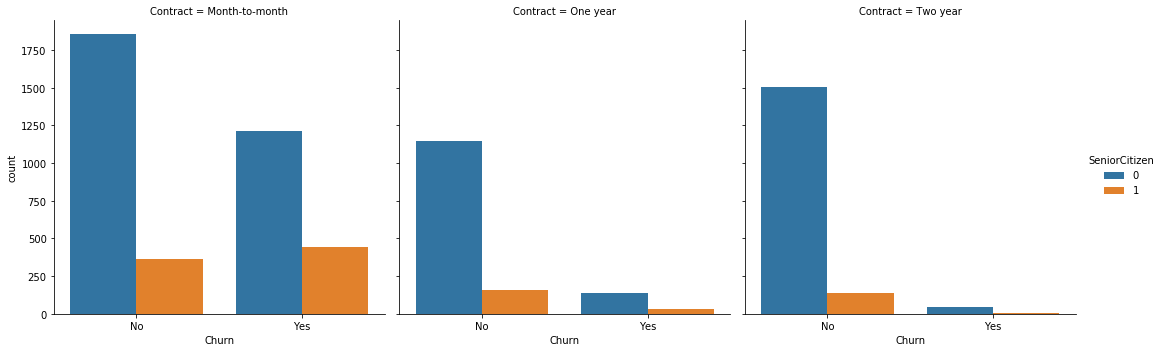

In [19]:
sns.catplot(x = 'Churn', hue = 'SeniorCitizen', data = telco, 
            col = 'Contract', kind = 'count', height = 5, aspect = 1);

The most striking part of this chart is that Senior Citizens are much more likely to churn on the month to month contract.

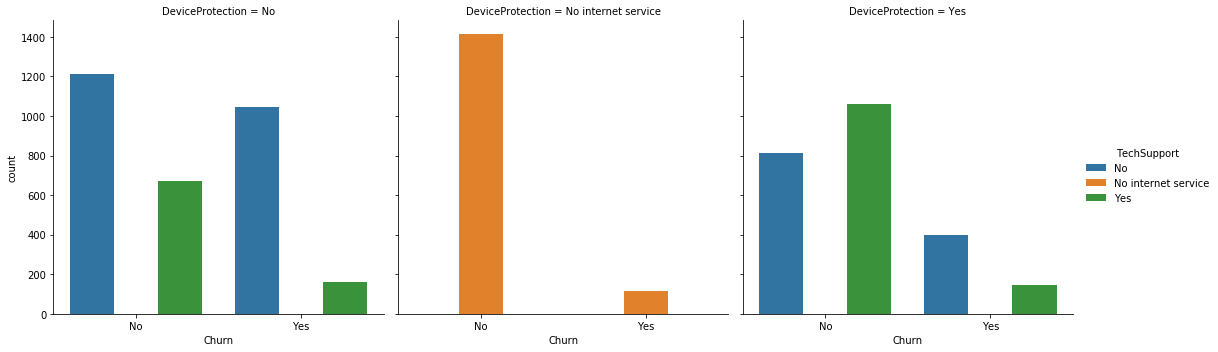

In [20]:
sns.catplot(x = 'Churn', hue = 'TechSupport', data = telco, 
            col = 'DeviceProtection', kind = 'count', height = 5, aspect = 1);

Tech support seems to make a big difference for customers, while the significance of device protection is unclear.

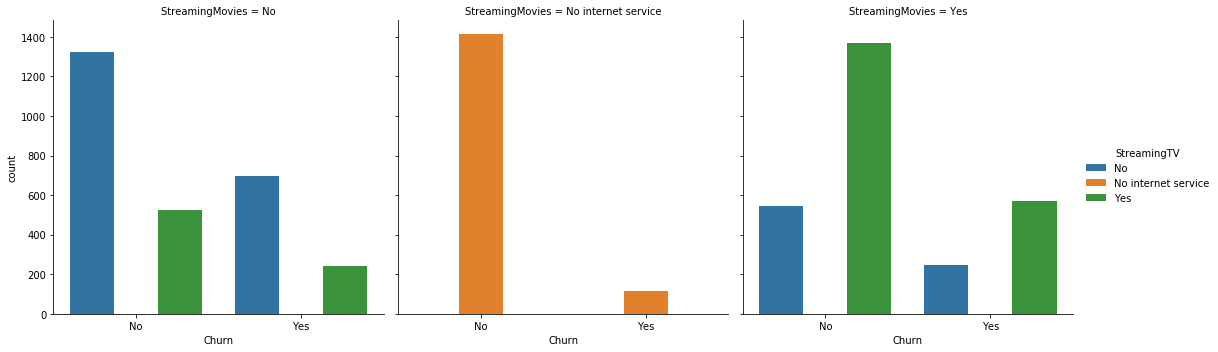

In [21]:
sns.catplot(x = 'Churn', hue = 'StreamingTV', data = telco, 
            col = 'StreamingMovies', kind = 'count', height = 5, aspect = 1);

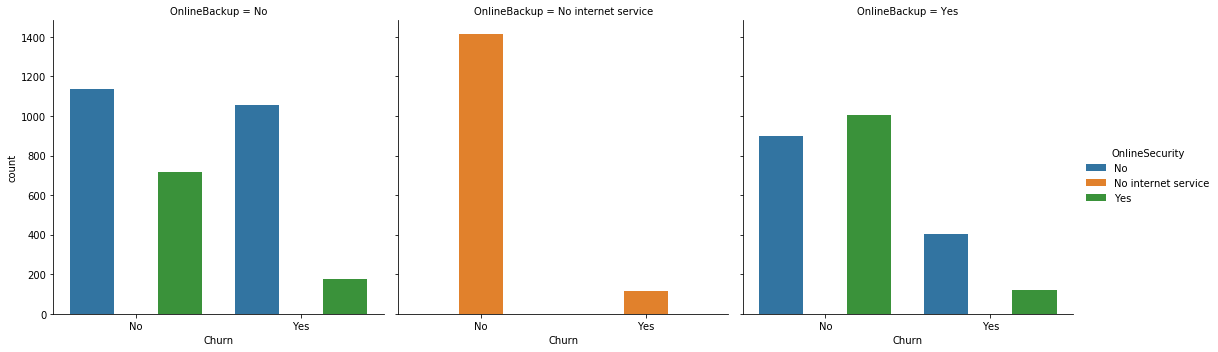

In [22]:
sns.catplot(x = 'Churn', hue = 'OnlineSecurity', data = telco, 
            col = 'OnlineBackup', kind = 'count', height = 5, aspect = 1);

### One Hot Encoding and Normalizing the Data

In [23]:
#differentiate categorical and numeric
num_cols = telco.select_dtypes(['integer', 'float']).columns
cat_cols = telco.select_dtypes(['category']).drop(columns = "Churn").columns

print("Numeric columns are {}.".format(", ".join(num_cols)))
print("Categorical columns are {}.".format(", ".join(cat_cols)))

Numeric columns are tenure, MonthlyCharges, TotalCharges.
Categorical columns are gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod.


In [24]:
#split train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns = "Churn"), telco["Churn"], 
                                                    test_size = 0.25, random_state = 42)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

print(f"Training data has {X_train.shape[0]} rows.")
print(f"Test data has {X_test.shape[0]} rows.")

Training data has 5282 rows.
Test data has 1761 rows.


In [25]:
#one hot encode non numeric columns
from sklearn.preprocessing import OneHotEncoder

onehoter = OneHotEncoder(sparse = False, drop = "first")
onehoter.fit(X_train[cat_cols])
onehot_cols = onehoter.get_feature_names(cat_cols)
X_train_onehot = pd.DataFrame(onehoter.transform(X_train[cat_cols]), columns = onehot_cols)
X_test_onehot = pd.DataFrame(onehoter.transform(X_test[cat_cols]), columns = onehot_cols)

In [26]:
#normalize numeric columns
from sklearn.preprocessing import StandardScaler

znormalizer = StandardScaler()
znormalizer.fit(X_train[num_cols])
X_train_norm = pd.DataFrame(znormalizer.transform(X_train[num_cols]), columns = num_cols)
X_test_norm = pd.DataFrame(znormalizer.transform(X_test[num_cols]), columns = num_cols)
X_train_norm.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.282882,-1.310046,-0.999361
1,-1.037857,0.344832,-0.778920
2,-1.160369,-1.484331,-0.972804
3,-0.139429,0.373049,-0.033271
4,-1.201207,0.343172,-0.891103


In [27]:
X_train_featurized = X_train_onehot # add one-hot-encoded columns
X_test_featurized = X_test_onehot   # add one-hot-encoded columns
X_train_featurized[num_cols] = X_train_norm # add numeric columns
X_test_featurized[num_cols] = X_test_norm   # add numeric columns

del X_train_norm, X_test_norm, X_train_onehot, X_test_onehot

print("Featurized training data has {} rows and {} columns.".format(*X_train_featurized.shape))
print("Featurized test data has {} rows and {} columns.".format(*X_test_featurized.shape))

Featurized training data has 5282 rows and 30 columns.
Featurized test data has 1761 rows and 30 columns.


### Modeling

In [28]:
#train and predict

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter = 5000)
logit.fit(X_train_featurized, y_train)

y_hat_train = logit.predict(X_train_featurized)
y_hat_test = logit.predict(X_test_featurized)

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precision_train = precision_score(y_train, y_hat_train, pos_label = 'Yes') * 100
precision_test = precision_score(y_test, y_hat_test, pos_label = 'Yes') * 100

recall_train = recall_score(y_train, y_hat_train, pos_label = 'Yes') * 100
recall_test = recall_score(y_test, y_hat_test, pos_label = 'Yes') * 100

print("Precision = {:.0f}% and recall = {:.0f}% on the training data.".format(precision_train, recall_train))
print("Precision = {:.0f}% and recall = {:.0f}% on the test data.".format(precision_test, recall_test))

Precision = 66% and recall = 53% on the training data.
Precision = 68% and recall = 58% on the test data.


We're seeing very good performance on the test data. Above 50% precision and recall is quite good.

In [30]:
accuracy_train = accuracy_score(y_train, y_hat_train) * 100
accuracy_test = accuracy_score(y_test, y_hat_test) * 100

print("Accuracy = {:.0f}% on the training data.".format(accuracy_train))
print("Accuracy = {:.0f}% on the test data.".format(accuracy_test))

Accuracy = 80% on the training data.
Accuracy = 81% on the test data.


81% overall accuracy on the predictions. Let's plot AUC now.

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(models, model_names):
    plt.figure(0, figsize = [8, 7]).clf()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for ii, model in enumerate(models):
        y_prob_test = model.predict_proba(X_test_featurized)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_prob_test, pos_label = "Yes")
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label = "{} AUC = {:0.2f}".format(model_names[ii], roc_auc))

    plt.legend(loc = 'lower right');

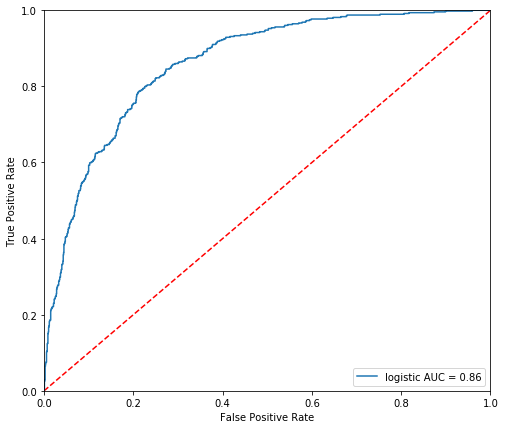

In [32]:
plot_roc([logit], ['logistic'])

In [39]:
print(logit.intercept_)
print(logit.coef_)

[-1.61636264]
[[-0.04708616  0.14497165  0.01353384 -0.16066118 -0.18674141  0.19094196
   0.29946675  1.02553866 -0.15746799 -0.15746799 -0.39645463 -0.15746799
  -0.1418897  -0.15746799  0.02207905 -0.15746799 -0.28470755 -0.15746799
   0.24106158 -0.15746799  0.36089598 -0.64217622 -1.48924792  0.30551703
  -0.11210505  0.31011952 -0.05994672 -1.33402369 -0.36859776  0.65227628]]


### Final Thoughts

With a 86% AUC we can safely say that the model has good performance and generalizes well. There are still some false positives, which a more complex model may be able to pick up. That may be something we could look at for next steps.

The implications of the model are that we can now predict churn of a customer beforehand and then put together retention plans going forward. For example, we noted that customers are price sensitive. If we were able to individually target customers most likely to churn due to price, we could put together a discount package or a deal to bundle other things together to make our offering more competitive.

The benefit of going with a logistic regression here vs a more complex model is its tendency to not overfit and also its interpretability. Notice how we were able to get very good test results with no drop off from the training set. This is a good sign for the model's performance going forward.